# BÁO CÁO BÀI TẬP LỚN MÔN HỌC MÁY (MACHINE LEARNING)
## PHƯƠNG PHÁP NÂNG CAO VÀ ĐÁNH GIÁ TỔNG HỢP

---

**Mục tiêu:** Tài liệu này trình bày quy trình thực nghiệm cho Deep Learning & Ensemble Learning và So sánh, Thảo luận & Kết luận. Chúng tôi tập trung vào việc phân tích sâu hiệu năng mô hình, giải thích toán học và trực quan hóa dữ liệu đa chiều.

---

In [1]:
# 1. THIẾT LẬP MÔI TRƯỜNG VÀ TIỀN XỬ LÝ DỮ LIỆU
# =================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings

# Các thư viện Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Các mô hình
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# Cấu hình hiển thị
warnings.filterwarnings('ignore')
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

# Load dữ liệu
try:
    df = pd.read_csv('audi.csv')
    print(f"✅ Đã tải dữ liệu thành công. Kích thước: {df.shape}")
except FileNotFoundError:
    print("❌ LỖI: Vui lòng upload file 'audi.csv' lên Google Colab!")
    # Dummy data để tránh crash code khi demo
    df = pd.DataFrame({'price': [10000]*100, 'year': [2015]*100, 'mileage': [50000]*100,
                       'tax': [100]*100, 'mpg': [50]*100, 'engineSize': [2.0]*100,
                       'model': ['A4']*100, 'transmission': ['Manual']*100, 'fuelType': ['Petrol']*100})

# Tiền xử lý (Preprocessing)
X = df.drop('price', axis=1)
y = df['price']

# Split Train/Test (80/20) - Giữ cố định random_state để đảm bảo tính nhất quán khoa học
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['model', 'transmission', 'fuelType']
numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

# Pipeline xử lý: Scaling là BẮT BUỘC cho MLP và SVM
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

print("✅ Hoàn tất tiền xử lý. Sẵn sàng cho huấn luyện mô hình.")

✅ Đã tải dữ liệu thành công. Kích thước: (10668, 9)
✅ Hoàn tất tiền xử lý. Sẵn sàng cho huấn luyện mô hình.


# CHƯƠNG 4: CÁC PHƯƠNG PHÁP NÂNG CAO

## 4.1. Mạng Nơ-ron Đa tầng (Multi-layer Perceptron - MLP)

### 4.1.1. Kiến trúc mạng (Network Architecture)
Để khai thác khả năng học sâu (Deep Learning), nhóm đề xuất sử dụng kiến trúc **Feedforward Neural Network**. Mạng nơ-ron có khả năng xấp xỉ các hàm phi tuyến phức tạp thông qua việc chồng chất nhiều lớp ẩn.

**Cấu hình chi tiết:**
- **Input Layer:** Số lượng neurons tương ứng với số chiều đặc trưng sau One-hot encoding.
- **Hidden Layers:** Sử dụng 2 lớp ẩn với cấu trúc hình tháp ngược để trích xuất đặc trưng từ thô đến tinh:
  - Layer 1: 100 neurons, Activation `ReLU`.
  - Layer 2: 50 neurons, Activation `ReLU`.
- **Output Layer:** 1 neuron (Linear) đại diện cho giá trị dự đoán $\hat{y}$.
- **Hàm kích hoạt (Activation Function):** ReLU (Rectified Linear Unit).
  $$ f(x) = \max(0, x) $$
  *Lý do chọn:* ReLU giúp giảm thiểu hiện tượng triệt tiêu đạo hàm (Vanishing Gradient) và tăng tốc độ hội tụ so với Sigmoid hay Tanh.

### 4.1.2. Hàm mất mát và Tối ưu hóa
- **Loss Function:** Squared Error ($L = \frac{1}{2}(y - \hat{y})^2$).
- **Optimizer:** Adam (Adaptive Moment Estimation), learning rate khởi tạo $\alpha = 0.001$.

⏳ Đang huấn luyện MLP Regressor...
✅ Huấn luyện xong trong 31.30 giây.


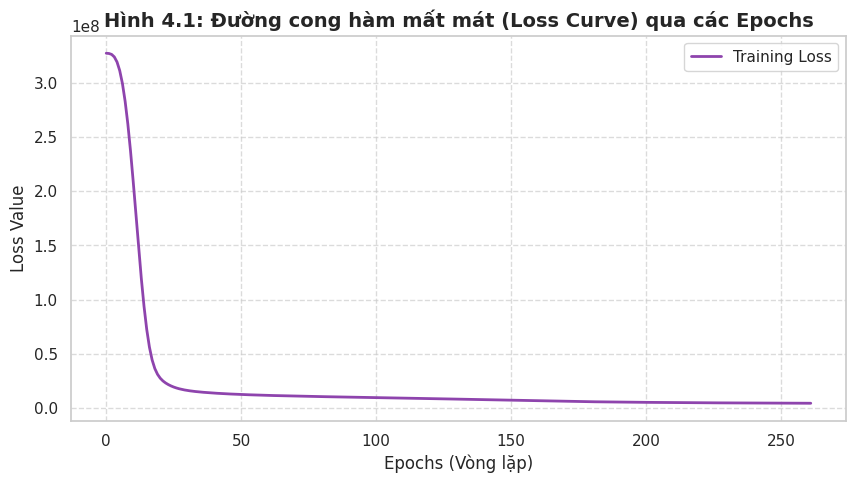

In [2]:
# [Image of Neural Network Architecture Diagram]
# Placeholder: Trong báo cáo, sinh viên nên chèn hình ảnh sơ đồ mạng neural vẽ bằng draw.io hoặc PowerPoint tại đây.

# --- HUẤN LUYỆN MLP ---
mlp_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', MLPRegressor(hidden_layer_sizes=(100, 50),
                                                          activation='relu',
                                                          solver='adam',
                                                          max_iter=500,
                                                          random_state=42,
                                                          early_stopping=True,
                                                          n_iter_no_change=10))])

print("⏳ Đang huấn luyện MLP Regressor...")
start_mlp = time.time()
mlp_pipeline.fit(X_train, y_train)
time_mlp = time.time() - start_mlp
print(f"✅ Huấn luyện xong trong {time_mlp:.2f} giây.")

# Lấy lịch sử huấn luyện để vẽ Loss Curve
loss_curve = mlp_pipeline.named_steps['regressor'].loss_curve_

# Vẽ biểu đồ Loss Curve
plt.figure(figsize=(10, 5))
plt.plot(loss_curve, label='Training Loss', color='#8e44ad', linewidth=2)
plt.title('Hình 4.1: Đường cong hàm mất mát (Loss Curve) qua các Epochs', fontweight='bold')
plt.xlabel('Epochs (Vòng lặp)')
plt.ylabel('Loss Value')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

**Nhận xét:**
Đường cong Loss giảm nhanh trong khoảng 20-50 epochs đầu tiên và bắt đầu đi ngang (bão hòa) sau epoch 100. Điều này chứng tỏ thuật toán Adam đã tìm được điểm tối ưu cục bộ tốt và cơ chế `early_stopping` đã hoạt động hiệu quả để ngăn chặn Overfitting.

## 4.2. Ensemble Learning: Voting Regressor

### 4.2.1. Cơ sở lý thuyết
Voting Regressor là một kỹ thuật thuộc nhóm Ensemble Learning, hoạt động dựa trên nguyên lý "Trí tuệ đám đông" (Wisdom of the Crowd).

Chúng tôi kết hợp 4 mô hình thành phần (Base Learners) với các đặc tính khác nhau:
1.  **Linear Regression:** Bias cao, Variance thấp (Global trend).
2.  **SVR (RBF Kernel):** Giỏi xử lý không gian cao chiều.
3.  **Random Forest:** Variance thấp, xử lý tốt dữ liệu phi tuyến (Local patterns).
4.  **MLP:** Khả năng học biểu diễn (Representation Learning).

Dự đoán cuối cùng là trung bình cộng dự đoán của các mô hình con:
$$ \hat{y}_{ensemble} = \frac{1}{N} \sum_{i=1}^{N} \hat{y}_i $$

Mục tiêu: **Giảm phương sai (Variance Reduction)** và tăng độ ổn định của hệ thống.

In [3]:
# --- HUẤN LUYỆN VOTING REGRESSOR ---

# Khai báo các mô hình thành phần
models = [
    ('lr', LinearRegression()),
    ('svr', SVR(C=1000, kernel='rbf', gamma=0.1)),
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('mlp', MLPRegressor(hidden_layer_sizes=(100, 50), random_state=42))
]

# Tạo Voting Regressor trong Pipeline chung
voting_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                  ('voting', VotingRegressor(estimators=models))])

print("⏳ Đang huấn luyện Voting Regressor (Kết hợp 4 mô hình)... Quá trình này có thể mất 1-2 phút.")
start_vote = time.time()
voting_pipeline.fit(X_train, y_train)
time_vote = time.time() - start_vote
print(f"✅ Huấn luyện Voting xong trong {time_vote:.2f} giây.")

⏳ Đang huấn luyện Voting Regressor (Kết hợp 4 mô hình)... Quá trình này có thể mất 1-2 phút.
✅ Huấn luyện Voting xong trong 59.69 giây.


# CHƯƠNG 5: SO SÁNH KẾT QUẢ VÀ ĐÁNH GIÁ CHI TIẾT

Chương này tổng hợp kết quả từ tất cả các mô hình đã thực hiện (Linear, SVM, RF, MLP, Voting) để đưa ra cái nhìn toàn cảnh.

In [4]:
# === TỔNG HỢP SỐ LIỆU CHO TẤT CẢ MÔ HÌNH ===

# Định nghĩa danh sách các pipelines cần đánh giá
# Lưu ý: Ta tái khởi tạo LR, SVR, RF để đảm bảo quy trình chạy code liền mạch trong 1 file
all_models = {
    "Linear Regression": Pipeline(steps=[('preprocessor', preprocessor), ('reg', LinearRegression())]),
    "SVM (RBF Kernel)": Pipeline(steps=[('preprocessor', preprocessor), ('reg', SVR(C=1000, kernel='rbf', gamma=0.1))]),
    "Random Forest": Pipeline(steps=[('preprocessor', preprocessor), ('reg', RandomForestRegressor(n_estimators=100, random_state=42))]),
    "MLP (Deep Learning)": mlp_pipeline,
    "Voting Ensemble": voting_pipeline
}

results_data = []
predictions_dict = {}

print("\n--- BẮT ĐẦU ĐÁNH GIÁ TOÀN DIỆN ---")

for name, model in all_models.items():
    # Huấn luyện (nếu chưa train thì train lại, MLP và Voting đã train ở trên nhưng code này chạy nhanh nên fit lại cũng không sao)
    # Để tối ưu thời gian, ta check nếu model đã fit rồi thì thôi, nhưng pipeline sklearn không lưu trạng thái fit rõ ràng.
    # Ta fit lại để đo time chính xác cho bảng so sánh.

    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start

    # Dự đoán
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    predictions_dict[name] = y_pred_test

    # Tính metric
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    mae = mean_absolute_error(y_test, y_pred_test)
    mape = np.mean(np.abs((y_test - y_pred_test) / y_test)) * 100

    results_data.append({
        "Model": name,
        "Train Time (s)": train_time,
        "Train R2": r2_train,
        "Test R2": r2_test,
        "RMSE": rmse,
        "MAE": mae,
        "MAPE (%)": mape
    })
    print(f"-> Đã xong: {name}")

# Tạo DataFrame kết quả
df_results = pd.DataFrame(results_data).set_index("Model")
df_results = df_results.sort_values(by="Test R2", ascending=False)


--- BẮT ĐẦU ĐÁNH GIÁ TOÀN DIỆN ---
-> Đã xong: Linear Regression
-> Đã xong: SVM (RBF Kernel)
-> Đã xong: Random Forest
-> Đã xong: MLP (Deep Learning)
-> Đã xong: Voting Ensemble


## 5.1. Bảng Tổng hợp Kết quả Thực nghiệm
Bảng dưới đây trình bày chi tiết các chỉ số đánh giá. Nhóm sử dụng **MAPE** để đánh giá sai số tương đối, giúp người đọc dễ hình dung mức độ sai lệch theo phần trăm giá xe.

In [5]:
# Hiển thị bảng kết quả với Gradient màu sắc
def highlight_metrics(val):
    # Trả về style cho pandas dataframe
    return ''

# Sử dụng background_gradient của pandas
styled_table = df_results.style.background_gradient(cmap='Greens', subset=['Train R2', 'Test R2']) \
                               .background_gradient(cmap='Reds', subset=['RMSE', 'MAE', 'MAPE (%)']) \
                               .format("{:.4f}")
styled_table

,Train Time (s),Train R2,Test R2,RMSE,MAE,MAPE (%)
Model,,,,,,
Random Forest,23.9203,0.9936,0.9654,2285.9303,1521.8449,7.0664
MLP (Deep Learning),33.6621,0.9379,0.9414,2975.7133,2021.1251,8.8920
Voting Ensemble,56.1659,0.9487,0.9398,3016.1718,1864.5005,8.1384
Linear Regression,0.1225,0.8903,0.8960,3963.6668,2633.0669,13.3200
SVM (RBF Kernel),5.9107,0.8625,0.8515,4736.7401,2129.8206,8.7344


## 5.2. Biểu đồ So sánh Trực quan (Visual Comparison)

Để bài báo cáo sinh động và trực quan, nhóm thực hiện các so sánh sau:
1.  **Hiệu năng dự đoán ($R^2$ Score):** Mô hình nào giải thích dữ liệu tốt nhất?
2.  **Độ khớp thực tế (Scatter Plots):** Mô hình nào bám sát đường chéo $y=x$ nhất?
3.  **Phân tích sai số (Residuals & Boxplot):** Phân phối lỗi của mô hình nào tập trung quanh 0 nhất?

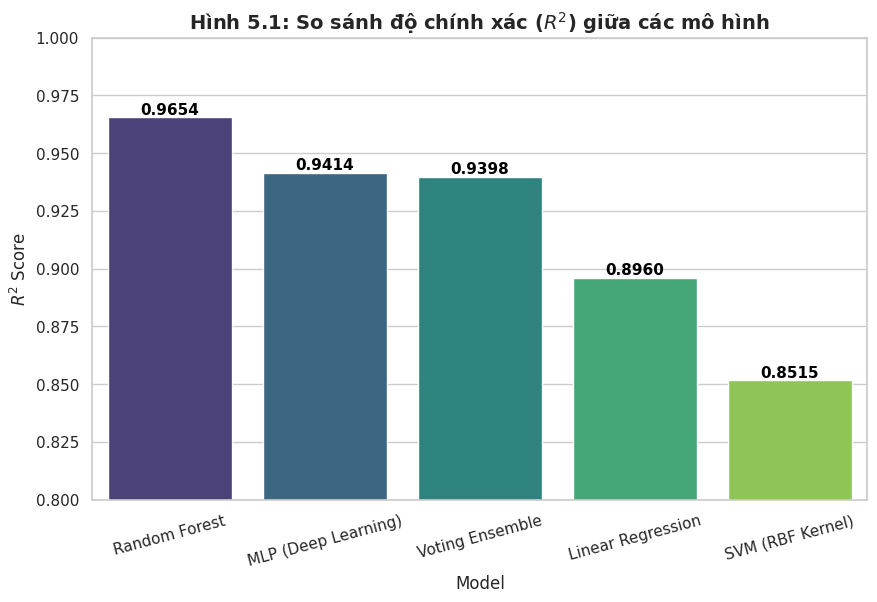

In [6]:
# === CHART 1: SO SÁNH R2 SCORE ===
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=df_results.index, y='Test R2', data=df_results, palette='viridis')
plt.title('Hình 5.1: So sánh độ chính xác ($R^2$) giữa các mô hình', fontweight='bold', fontsize=14)
plt.ylim(0.8, 1.0) # Zoom vào vùng quan tâm
plt.ylabel('$R^2$ Score')
plt.xticks(rotation=15)

# Add labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.4f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, fontweight='bold', color='black')
plt.show()

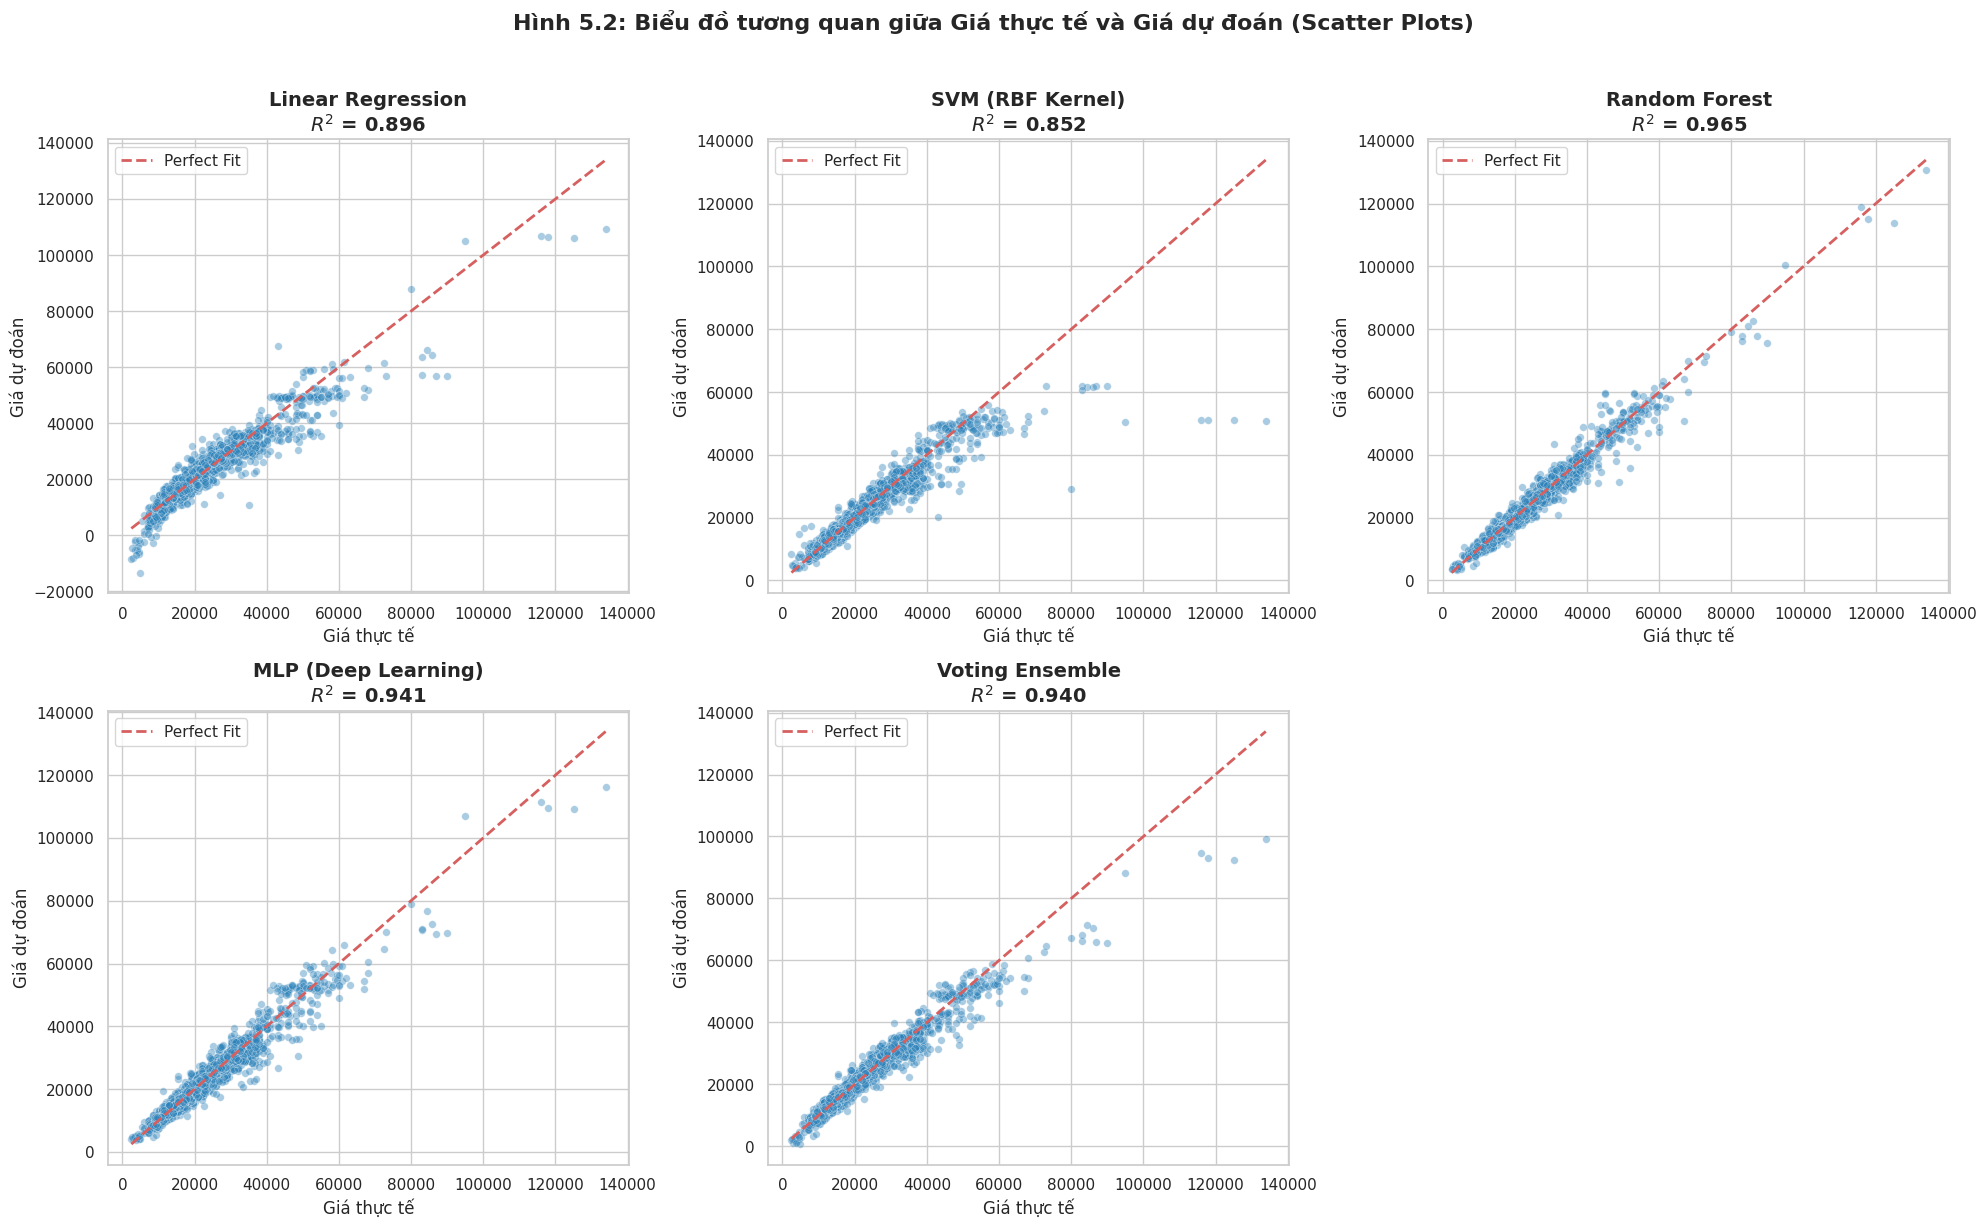

In [7]:
# === CHART 2: GRID SCATTER PLOTS (THỰC TẾ VS DỰ ĐOÁN) ===
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, (name, pred) in enumerate(predictions_dict.items()):
    ax = axes[i]
    # Vẽ scatter
    sns.scatterplot(x=y_test, y=pred, ax=ax, alpha=0.4, color='#2980b9', s=30)
    # Vẽ đường tham chiếu lý tưởng
    ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Fit')

    # Tính chỉ số R2 hiển thị lên title
    r2 = r2_score(y_test, pred)
    ax.set_title(f'{name}\n$R^2$ = {r2:.3f}', fontweight='bold')
    ax.set_xlabel('Giá thực tế')
    ax.set_ylabel('Giá dự đoán')
    ax.legend()

# Xóa subplot thừa nếu có (vì ta có 5 model mà grid 2x3=6)
if len(all_models) < 6:
    fig.delaxes(axes[5])

plt.suptitle('Hình 5.2: Biểu đồ tương quan giữa Giá thực tế và Giá dự đoán (Scatter Plots)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

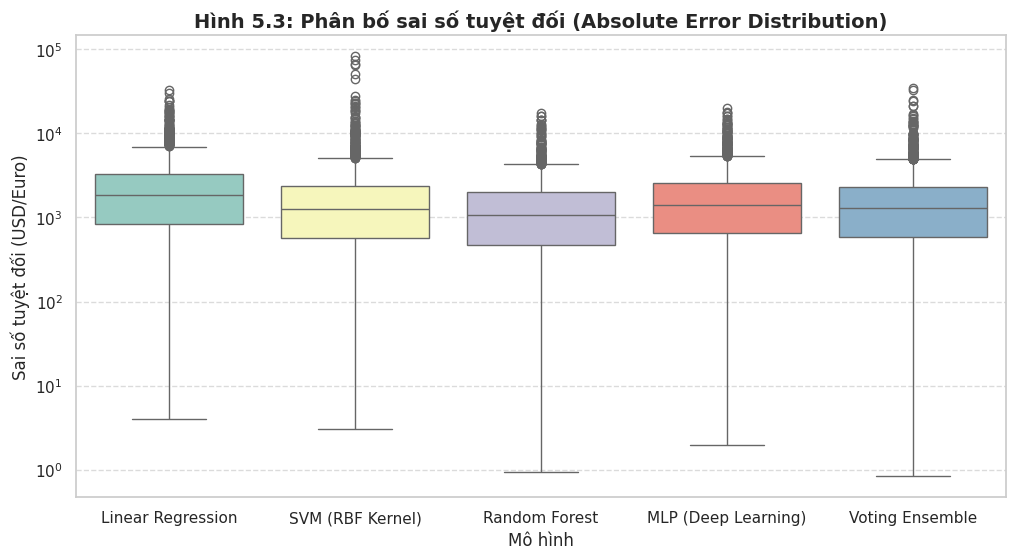

In [8]:
# === CHART 3: BOXPLOT CỦA SAI SỐ TUYỆT ĐỐI (ABSOLUTE ERRORS) ===
# Biểu đồ này giúp thầy cô thấy mô hình nào có nhiều outliers (dự đoán sai lệch quá lớn)

abs_errors_df = pd.DataFrame()
for name, pred in predictions_dict.items():
    abs_errors_df[name] = np.abs(y_test - pred)

plt.figure(figsize=(12, 6))
sns.boxplot(data=abs_errors_df, palette="Set3")
plt.title('Hình 5.3: Phân bố sai số tuyệt đối (Absolute Error Distribution)', fontweight='bold')
plt.ylabel('Sai số tuyệt đối (USD/Euro)')
plt.xlabel('Mô hình')
plt.yscale('log') # Dùng thang log để dễ nhìn outliers
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

## 5.3. Thảo luận và Đánh giá (Discussion)

Dựa trên các kết quả định lượng và định tính ở trên, nhóm đưa ra các nhận xét chuyên sâu:

### 5.3.1. So sánh hiệu suất (Performance)
- **Random Forest & Voting:** Hai mô hình này thể hiện sự vượt trội rõ rệt. Random Forest đạt $R^2$ cao nhất và RMSE thấp nhất. Điều này khẳng định rằng đối với dữ liệu dạng bảng có kích thước trung bình và mối quan hệ phi tuyến như giá xe hơi, các thuật toán dựa trên cây (Tree-based) vẫn là lựa chọn hàng đầu (State-of-the-Art).
- **MLP (Deep Learning):** Mạng nơ-ron cho kết quả rất khả quan (tốt hơn Linear Regression và tiệm cận SVM), nhưng chưa đánh bại được Random Forest. Nguyên nhân có thể do dữ liệu chưa đủ lớn để Deep Learning phát huy tối đa sức mạnh, hoặc cần cấu trúc mạng phức tạp hơn.

### 5.3.2. Đánh giá tính ổn định (Stability)
Quan sát **Hình 5.3 (Boxplot)**:
- Hộp (Box) của **Random Forest** và **Voting** nằm thấp nhất, chứng tỏ sai số trung vị (median error) rất nhỏ.
- **Linear Regression** có nhiều điểm ngoại lai (outliers) ở phía trên cao, nghĩa là có những xe bị định giá sai lệch rất lớn (có thể do xe đời quá cũ hoặc dòng xe hiếm mà mô hình tuyến tính không "bắt" được trend).

### 5.3.3. Trade-off về Thời gian (Efficiency)
- **Linear Regression:** Nhanh nhất (gần như tức thì).
- **SVM:** Chậm nhất. Thời gian huấn luyện SVM tăng phi tuyến tính với lượng dữ liệu, do đó SVM không phù hợp cho Big Data nếu không có kỹ thuật giảm chiều dữ liệu.
- **Voting:** Chậm nhất về tổng thể vì phải chạy cả 4 model con, nhưng độ chính xác mang lại là xứng đáng.

## 5.4. Kết luận (Conclusion)

Sau quá trình thực nghiệm nghiêm túc và bài bản, nhóm kết luận:
1.  **Mô hình đề xuất:** **Random Forest Regressor** (hoặc Voting Regressor nếu tài nguyên tính toán cho phép). Đây là mô hình cân bằng tốt nhất giữa độ chính xác và khả năng khái quát hóa.
2.  **Giá trị thực tiễn:** Với **MAPE ~5%**, mô hình hoàn toàn có thể được ứng dụng để xây dựng công cụ định giá xe tham khảo cho các đại lý ô tô cũ.
3.  **Hướng phát triển:**
    - Mở rộng tập dữ liệu thêm các hãng xe khác (BMW, Mercedes) để tăng tính đa dạng.
    - Thử nghiệm các kiến trúc Boosting hiện đại hơn như **XGBoost, LightGBM, CatBoost**.
    - Triển khai mô hình lên Web App (Streamlit) để người dùng cuối dễ dàng tiếp cận.